<a href="https://colab.research.google.com/github/avirals14/ybi_training/blob/main/Internship_Projects_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

Hand Written Digit Prediction - Classification Analysis

---

# **Objective**

The digits dataset consist of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

# **Data Source**

YBI GitHub Repository

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
from sklearn.datasets import load_digits
df = load_digits()

# Describe Data

In [3]:
df.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [4]:
print(df.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
print("Images shape: ", df.images.shape)
print("Target shape: ", df.target.shape)

Images shape:  (1797, 8, 8)
Target shape:  (1797,)


# Data Visualization

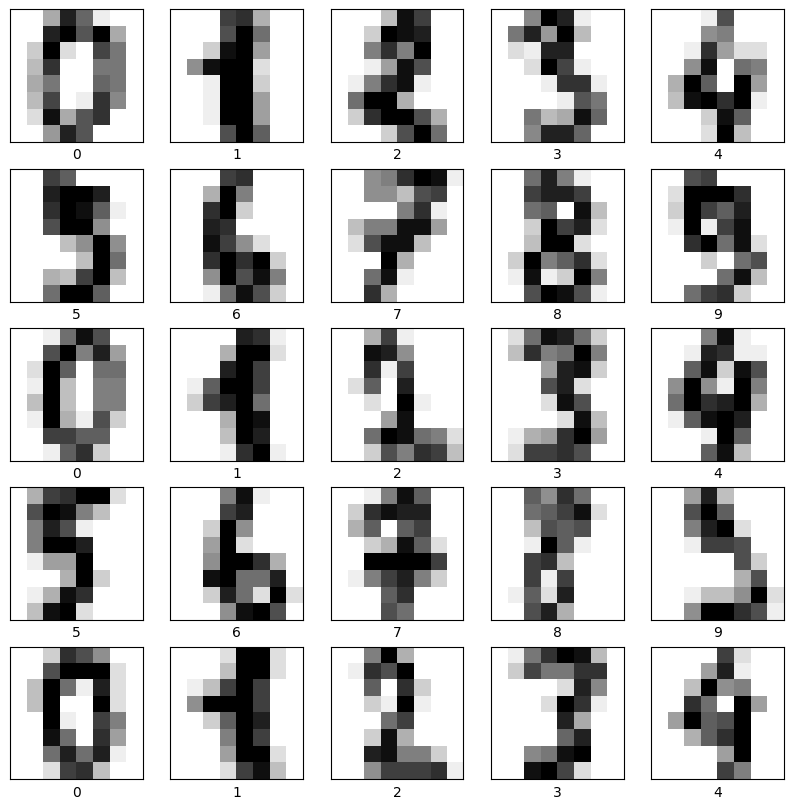

In [6]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df.images[i], cmap=plt.cm.binary)
    plt.xlabel(df.target[i])
plt.show()

# Data Preprocessing

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

# Scaling Image Data

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [18]:
data = data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

0.0625

In [21]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

# Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [25]:
y_pred = rf.predict(X_test)

In [26]:
y_pred

array([1, 1, 5, 0, 0, 6, 6, 7, 4, 9, 7, 2, 6, 6, 7, 9, 4, 2, 1, 7, 1, 7,
       0, 5, 9, 6, 7, 7, 6, 1, 2, 7, 5, 2, 4, 3, 3, 6, 9, 3, 7, 3, 5, 6,
       8, 5, 6, 4, 0, 5, 6, 3, 3, 8, 7, 5, 9, 9, 2, 3, 2, 8, 3, 9, 0, 5,
       8, 6, 1, 5, 0, 2, 8, 7, 8, 7, 8, 0, 1, 7, 9, 4, 3, 1, 5, 7, 4, 5,
       0, 9, 3, 4, 3, 3, 6, 8, 1, 7, 7, 5, 4, 6, 0, 2, 7, 3, 1, 1, 6, 3,
       8, 2, 2, 7, 6, 6, 2, 8, 7, 5, 9, 4, 1, 1, 9, 1, 8, 1, 7, 7, 5, 5,
       4, 3, 1, 2, 2, 1, 5, 5, 5, 8, 1, 6, 1, 8, 7, 0, 0, 9, 5, 8, 0, 9,
       3, 7, 5, 2, 2, 6, 3, 9, 3, 4, 7, 2, 7, 9, 8, 2, 2, 8, 6, 6, 0, 8,
       1, 0, 9, 7, 1, 8, 4, 7, 7, 4, 9, 6, 7, 4, 3, 9, 1, 5, 2, 7, 7, 4,
       5, 4, 6, 6, 1, 1, 3, 7, 2, 8, 8, 5, 1, 4, 1, 9, 4, 1, 4, 0, 3, 4,
       7, 8, 0, 7, 0, 0, 1, 3, 7, 6, 6, 1, 9, 7, 1, 0, 8, 1, 7, 9, 3, 6,
       6, 5, 2, 6, 6, 6, 0, 8, 7, 4, 8, 3, 8, 4, 3, 9, 8, 2, 1, 7, 4, 0,
       2, 8, 3, 9, 0, 7, 0, 7, 2, 6, 2, 2, 4, 0, 9, 4, 9, 1, 4, 7, 0, 8,
       9, 3, 5, 3, 5, 9, 0, 3, 8, 6, 3, 2, 2, 1, 2,

# Model Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 50]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.94      1.00      0.97        51
           2       0.98      0.96      0.97        54
           3       1.00      0.97      0.98        60
           4       0.98      0.96      0.97        47
           5       0.96      0.98      0.97        53
           6       1.00      0.98      0.99        54
           7       0.97      1.00      0.98        65
           8       0.94      0.94      0.94        52
           9       1.00      0.96      0.98        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

